### [Python數據科學：正則化方法！](https://kknews.cc/zh-tw/news/g3xllxm.html)
## [github](https://github.com/cylcc06/classpy.git)

<pre>
Python數據科學：正則化方法！
一、嶺回歸

嶺回歸通過人為加入的懲罰項(約束項)，對回歸係數進行估計，為有偏估計。

有偏估計，允許估計有不大的偏度，以換取估計的誤差顯著減小，並在其殘差平方和為最小的原則下估計回歸係數。
通常嶺回歸方程中的R²會稍低於線性回歸分析，但回歸係數的顯著性往往明顯高於普通線性回歸。
</pre>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import RidgeCV 
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! ln -fs /content/drive/"My Drive"/"Colab Notebooks"/Datascience /app

In [0]:
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Check if install CUDA Driver
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [0]:
%cd /app/classpy

/content/drive/My Drive/Colab Notebooks/Datascience/classpy


In [0]:
# 消除pandas輸出省略號情況及換行情況 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 
# 讀取數據,skipinitialspace:忽略分隔符後的空白 
df = pd.read_csv('creditcard_exp.csv', skipinitialspace=True) 
# 獲取信用卡有支出的行數據 
exp = df[df['avg_exp'].notnull()].copy().iloc[:, 2:].drop('age2', axis=1) 
# 獲取信用卡無支出的行數據,NaN 
exp_new = df[df['avg_exp'].isnull()].copy().iloc[:, 2:].drop('age2', axis=1)

In [0]:
# 選擇4個連續變量,分別是年齡 收入 當地小區價格 當地人均收入 
continuous_xcols = ['Age', 'Income', 'dist_home_val', 'dist_avg_income'] 
# 標準化 
scaler = StandardScaler() 
# 解釋變量,二維數組 
X = scaler.fit_transform(exp[continuous_xcols]) 
# 被解釋變量,一維數組 
y = exp['avg_exp_ln']

In [0]:
# 生成正則化係數 
alphas = np.logspace(-2, 3, 100, base=10) 
# 使用不同的正則化係數對模型進行交叉驗證 
rcv = RidgeCV(alphas=alphas, store_cv_values=True) 
# 使用數據集訓練(fit) 
rcv.fit(X, y) 
# 輸出最優參數,正則化係數及相應模型R² 
print('The best alpha is {}'.format(rcv.alpha_)) 
print('The r-square is {}'.format(rcv.score(X, y)))

The best alpha is 0.2915053062825176
The r-square is 0.4756826777019506


In [0]:
# 訓練好後使用transform進行數據轉換 
X_new = scaler.transform(exp_new[continuous_xcols]) 
# 使用模型對數據做預測 
print(np.exp(rcv.predict(X_new)[:5]))

[759.67677561 606.74024213 661.20654568 681.888929   641.06967182]


<pre>
最優正則化係數為0.29，模型R²為0.475。

並使用最優正則化係數下的嶺回歸模型預測數據。

對不同正則化係數下模型的均方誤差進行可視化。

</pre>

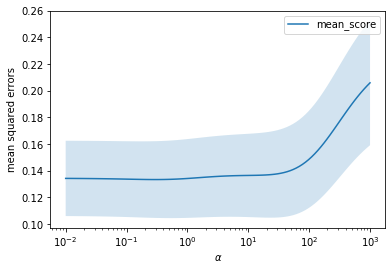

In [0]:
# 正則化係數搜索空間當中每輪交叉驗證的結果,模型的均方誤差 
cv_values = rcv.cv_values_ 
n_fold, n_alphas = cv_values.shape 
# 模型均方誤差上下波動值 
cv_mean = cv_values.mean(axis=0) 
cv_std = cv_values.std(axis=0) 
ub = cv_mean + cv_std / np.sqrt(n_fold) 
lb = cv_mean - cv_std / np.sqrt(n_fold) 
# 繪製折線圖,x軸是指數型形式 
plt.semilogx(alphas, cv_mean, label='mean_score') 
# y1(lb)和y2(ub)之間進行填充 
plt.fill_between(alphas, lb, ub, alpha=0.2) 
plt.xlabel('$\\alpha$') 
plt.ylabel('mean squared errors') 
plt.legend(loc='best') 
plt.show()

<pre>
發現正則化係數在40或50以下時，模型的均方誤差相差不大。

當係數超過該閾值時，均方誤差則快速上升。

所以正則化係數只要小於40或50，模型的擬合效果應該都不錯。

正則化係數越小則模型擬合越好，但過擬合情況也越容易發生。
正則化係數越大，則越不容易過擬合，但模型的偏差越大。
RidgeCV通過交叉驗證，可以快速返回「最優」的正則化係數。

當這只是基於數值計算的，可能最終結果並不符合業務邏輯。

比如本次模型的變量係數。

</pre>

In [0]:
# 輸出模型的變量係數 
print(rcv.coef_)

[ 0.03321449 -0.30956185  0.05551208  0.59067449]


發現收入的係數為負值，這肯定是不合理的。

下面通過嶺跡圖進行進一步分析。

嶺跡圖是在不同正則化係數下變量係數的軌跡。


In [0]:
ridge = Ridge() 
coefs = [] 
# 不同正則化係數下的變量係數 
for alpha in alphas: 
  ridge.set_params(alpha=alpha) 
  ridge.fit(X, y) 
  coefs.append(ridge.coef_)

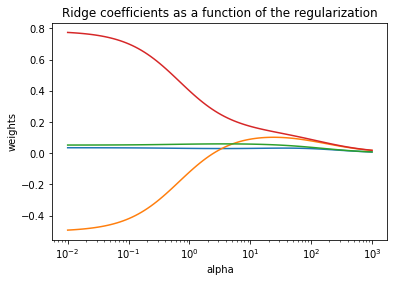

In [0]:
# 繪製變量係數隨正則化係數變化的軌跡 
ax = plt.gca() 
ax.plot(alphas, coefs) 
ax.set_xscale('log') 
plt.xlabel('alpha') 
plt.ylabel('weights') 
plt.title('Ridge coefficients as a function of the regularization') 
plt.axis('tight') 
plt.show()

<pre>
①有兩個變量的係數在不同的正則化係數下都很接近於0，那麼可以選擇刪除。
②正則化係數越大，對變量係數的懲罰越大，所有變量的係數都趨近於0。
③有一個變量的係數變化非常大(有正有負)，說明該係數的方差大，存在共線性的情況。
綜合模型均方誤差和嶺跡圖的情況，選取正則化係數為40。

如果大於40，則模型均方誤差增大，模型擬合效果變差。
如果小於40，則變量係數不穩定，共線性沒有得到抑制。

</pre>

In [0]:
ridge.set_params(alpha=40) 
ridge.fit(X, y) 
# 輸出變量係數 
print(ridge.coef_) 
# 輸出模型R² 
print(ridge.score(X, y)) 
# 預測數據 
print(np.exp(ridge.predict(X_new)[:5]))

[0.03293109 0.09907747 0.04976305 0.12101456]
0.4255673043353688
[934.79025945 727.11042209 703.88143602 759.04342764 709.54172995]


發現變量係數都為正值，符合業務直覺。

收入和當地人均收入這兩個變量可以保留，另外兩個刪除。

### [Deep Learning for Predicting Stock Prices](https://medium.com/@aditya.gogoi.30aug/deep-learning-for-predicting-stock-prices-1088534c683f)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [0]:
training_set = training_set.iloc[:,1:2].values # OPEN, [HIGH, LOW]

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [0]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

In [0]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [0]:
regressor.add(Dense(units = 1))

In [0]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

In [0]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))

In [0]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()